# Project: Machine Learning to Predict Probability of a Heart Disease

### About this notebook

This notebook is being split in a few sections. There are:-
* Introduction
* Data Information
* Data pre-processed
* Training
* Results Compilations
* Conclusion

## Introduction

Heart disease is not just the number one cause of death in Malaysia, it was also the number one cause of death worldwide. It affects both male and female. Everyone knows someone who had a heart issue. Lots of research had been invested into the possible causes of a heart disease. Machine learning could contribute in helping to reduce this number one killer. 

Drivendata has hosted a competition in predicting heart disease using Machine Learning. Participant has to submit a submission file and they will be rated based on the submissions. [drivendata Machine Learning Competition](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/)

This project will take the dataset, train them using machine learning algorithm and predict the probability of a patient having a heart disease. A label has been given in the dataset:-
* 0: Heart disease is not present
* 1: Heart disease present

In [134]:
#import the modules that will be used

%matplotlib inline

import warnings
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [135]:
# filter the warnings to show only once

warnings.filterwarnings('ignore')

In [136]:
#import the data

# for training our model
train_values = pd.read_csv('train_values.csv', index_col='patient_id')
train_labels = pd.read_csv('train_labels.csv', index_col='patient_id')

#for testing the model
test_values = pd.read_csv('test_values.csv', index_col='patient_id')

## Data Information

This dataset is provided courtesy of Cleveland Heart Disease Database from a competition organised by drivendata. The dataset collects various measurements on health and cardiovascular statistics. Patient's identities are anonymous. 

Dataset downnload: [drivendata](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/)

The train_values dataset is the data that will be used for training. The train_labels are its identifier (whether a patient has a heart disease or not). Once the final model has been chosen, it will then be tester on test_values dataset.

In [137]:
# Check for training data length

len(train_values)

180

In [138]:
# Check for testing data length

len (test_values)

90

The dataset has been split into training data and test data. Training data has 180 values, while the test data has 90 values. There are 14 columns in the training dataset, where patient_id serves as an identifier. Below are the attributes information  and type of the remaining 13 columns. 

From: [drivendata](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/109/)

Attribute Information: 
------------------------ 
1. slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
2. thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
3. resting_blood_pressure (type: int): resting blood pressure
4. chest_pain_type (type: int): chest pain type (4 values)
5. num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
6. fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
7. resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
8. serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
9. oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
10. sex (type: binary): 0: female, 1: male
11. age (type: int): age in years
12. max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
13. exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

--*labels: 1: Heart disease present. 0: Heart disease is not present
There are no missing values in this dataset. 

In [139]:
#Describe the data

display(train_values.describe())

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


The maximum value for serum_cholesterol_mg_per_dl is 564.000000. We will extract this particular information

In [140]:
#finding the outlier

train_values[train_values.serum_cholesterol_mg_per_dl == 564.000000]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
rv6siv,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0


The cholesterol level is on high end, especially any value exceeded 240mg/dl is considered ['very high'](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean). However, the highest cholesterol level ever recorded is 3165 mg/dl, [Guiness Book of Record](http://www.guinnessworldrecords.com/world-records/highest-triglyceride-level/), and that value is definitely an outlier. With this information, I shall keep this outlier in the dataset. 

## Data Pre-processed

### Feature Engineering

I would like to create a attribute called age-range. But before that, I would like an overview of the age distribution for train_values dataset. 

Text(0,0.5,'Frequency')

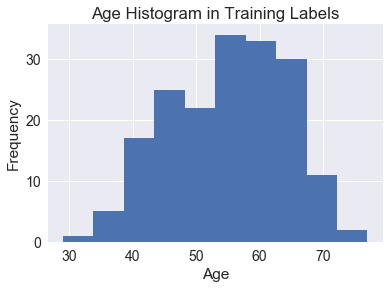

In [141]:
#histogram on age

plt.hist(train_values['age'])
plt.title("Age Histogram in Training Labels")
plt.xlabel("Age")
plt.ylabel("Frequency")

Majority of the age range falls around 50 to 70.  29 is the youngest age found in this dataset while 77 is the oldest. This new attribute will group the age as per below:-

* 21 to 40
* 41 to 60
* 61 to 80

The new feature is now being created in both train_values and test_values dataset. 

In [142]:
# Create new column called agerange in train_values

agelist =[]

for age in train_values['age']:
    if (21 <= age) & (age<= 40):
        agelist.append('21-40')
        
    if (41 <= age <= 60):
        agelist.append('41-60')
        
    if (61 <= age <= 80):
        agelist.append('61-80')
        
train_values['agerange']=agelist


In [143]:
# Create new column called agerange in test_values

agelist =[]

for age in test_values['age']:
    if (21 <= age) & (age<= 40):
        agelist.append('21-40')
        
    if (41 <= age <= 60):
        agelist.append('41-60')
        
    if (61 <= age <= 80):
        agelist.append('61-80')
        
test_values['agerange']=agelist

### One-hot encoding

One-hot encoding is done for thal and agerange feature. The encoding is done for both train_values and test_values. After it is done, the features have been expanded to 18 features

In [144]:
# One-hot encode the features agerange and thal data using pandas.get_dummies()
train_values_final = pd.get_dummies(train_values, columns=['thal','agerange'])

# Encode thal and agerange data to numerical values
#new_thal = thal.replace({'normal': 0, 'fixed_defect': 1, 'reversible_defect':2})
#new_age = agerange.replace({'21 to 40': 0, '41 to 60': 1, '61 to 80':2})

# Print the number of features after one-hot encoding
encoded = list(train_values_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

18 total features after one-hot encoding.
['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'thal_fixed_defect', 'thal_normal', 'thal_reversible_defect', 'agerange_21-40', 'agerange_41-60', 'agerange_61-80']


In [145]:
# do the same encoding with test_values

# One-hot encode the features agerange and thal data using pandas.get_dummies()
test_values_final = pd.get_dummies(test_values, columns=['thal','agerange'])

# Encode thal and agerange data to numerical values
#new_thal = thal.replace({'normal': 0, 'fixed_defect': 1, 'reversible_defect':2})
#new_age = agerange.replace({'21 to 40': 0, '41 to 60': 1, '61 to 80':2})

# Print the number of features after one-hot encoding
encoded_test = list(train_values_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded_test)

18 total features after one-hot encoding.
['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'thal_fixed_defect', 'thal_normal', 'thal_reversible_defect', 'agerange_21-40', 'agerange_41-60', 'agerange_61-80']


### Feature Scaling

Feature Scaling needs to be done as some features (resting_blood_pressure, max_heart_rate_achieved) have a three digits value and this may have a bigger a influence in the result compared to features that do not have a huge values like them.

MinMax Scaler is being used here as this algorithm shrink the range to a value between 0 and 1, so we have a pretty standard values for all the features. 

In [146]:
#feature scaling for the dataset

from sklearn import preprocessing

def scaling(train_values,test_values):
    scaler = preprocessing.MinMaxScaler()
    features_train = scaler.fit_transform(train_values)
    features_test = scaler.fit_transform(test_values)
    return features_train, features_test

In [147]:
features_train, features_test=scaling(train_values_final,test_values_final)

### Finding Correlation between features

Pearson's Correlation is implemented in order to know whether all the features are independent, and whether the features have relationship with the other. 

In [148]:
#heatmap, cos I'm finding correlation before deciding on the features
#first, need to join the train_labels with train_values

import seaborn as sns

overall=train_values_final.join(train_labels)
overall.head()


,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect,agerange_21-40,agerange_41-60,agerange_61-80,heart_disease_present
patient_id,,,,,,,,,,,,,,,,,,,
0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0,0,1,0,0
ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0,0,1,0,0
yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,0,1,0,0,0,1,1
l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,0,0,1,1,0,0,1
oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1,0,1,0,0


In [149]:
corr=overall.corr()

display(corr)

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect,agerange_21-40,agerange_41-60,agerange_61-80,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.157263,-0.305492,0.243341,-0.077045,-0.052659,0.095793,0.344224
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.127950,-0.098964,0.046578,-0.068941,-0.144424,0.187908,0.078506
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,-0.007042,-0.300914,0.307524,-0.067190,0.011850,0.022865,0.412829
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,-0.015493,-0.185283,0.194026,-0.183282,-0.138740,0.242028,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.125474,-0.023938,-0.028324,-0.111806,-0.021748,0.081597,0.003379
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.043308,0.023521,-0.041946,-0.082669,0.037290,0.004283,0.145933
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,-0.090092,0.021710,0.015760,-0.120142,-0.153982,0.224853,0.079775
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.055930,-0.332991,0.313616,-0.008504,-0.061858,0.069433,0.382930
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.144932,-0.421950,0.366381,0.071252,0.177716,-0.224086,0.335421
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.070984,-0.049719,0.020593,-0.490640,-0.471392,0.752912,0.138255


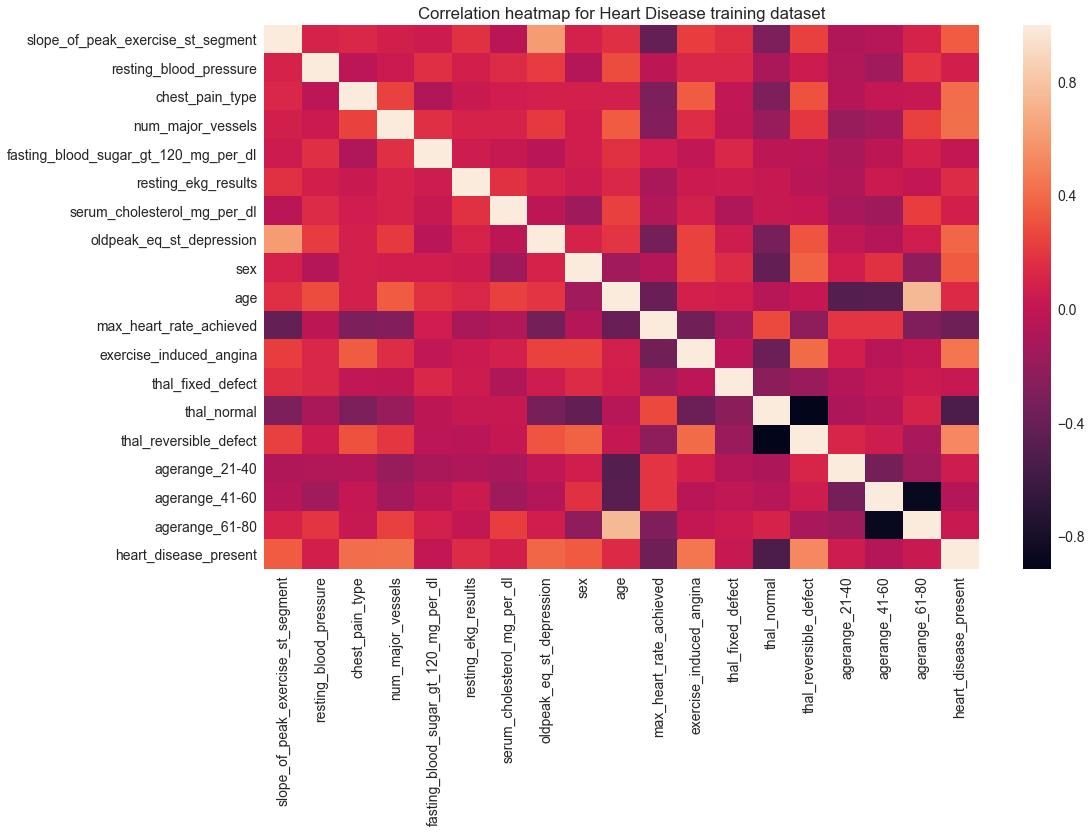

In [150]:
plt.figure(figsize=(16,10))
plt.title("Correlation heatmap for Heart Disease training dataset")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

From the heatmap above, we can see some featurs have a strong correlation with each other(eg; thal_normal and thal_reversible_defect has a strong negative correlation, while slope_of_peak_exercise_st_segment and oldpeak_eq_st_depression has a pretty strong positive correlation). Some moderate correlations also present in this heatmap (eg; thal_reversible_defect and exercise_induced_angina that has a moderate positive correlation). 

The heatmap tells us that the features are not independent of one another, as some featurs are strongly correlated. 

In [151]:
#get correlation to heart_disease_present

def get_corr(feature):

    return overall[feature].corr(overall['heart_disease_present'])

for feature in overall:
    print ('Correlation', feature,':', get_corr(feature))

Correlation slope_of_peak_exercise_st_segment : 0.344223986923
Correlation resting_blood_pressure : 0.0785057354407
Correlation chest_pain_type : 0.412828625366
Correlation num_major_vessels : 0.421518626048
Correlation fasting_blood_sugar_gt_120_mg_per_dl : 0.0033790726529
Correlation resting_ekg_results : 0.145933394351
Correlation serum_cholesterol_mg_per_dl : 0.0797748513149
Correlation oldpeak_eq_st_depression : 0.382930227959
Correlation sex : 0.335420930266
Correlation age : 0.138254706651
Correlation max_heart_rate_achieved : -0.375351869368
Correlation exercise_induced_angina : 0.448646516812
Correlation thal_fixed_defect : 0.0241121411085
Correlation thal_normal : -0.528811509654
Correlation thal_reversible_defect : 0.525145374593
Correlation agerange_21-40 : 0.0518615278818
Correlation agerange_41-60 : -0.0596889386449
Correlation agerange_61-80 : 0.0354314200906
Correlation heart_disease_present : 1.0


Below are the Top 5 features with the highest Pearson's correlation score:-

* thal_normal : -0.528811509654
* thal_reversible_defect : 0.525145374593
* exercise_induced_angina : 0.448646516812
* num_major_vessels : 0.421518626048
* chest_pain_type : 0.412828625366

There is a correlation between these five features with heart_disease_present feature, however, looking at the scores, the correlation isn't that strong. 

## Training

### Splitting the training dataset into test-validation

Although the dataset has been split into training and testing, I still want to further split the training set into training and testing set. This is because I do not want the algorithm to 'see' the data first. This will reduce the possibility of overfitting. Here, I will use StratifiedKFold.

In [152]:
from sklearn.model_selection import StratifiedKFold

def stratified_kf(features,labels):
    labels=labels.values
    skf = StratifiedKFold(n_splits=2, random_state=11)
    #skf.get_n_splits(features, labels)

    #print(skf)  


    for train_index, test_index in skf.split(features, labels):
        #print("TRAIN:", train_index, "TEST:", test_index)
        #print ('TEST', test_index)
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        return X_train, X_test, y_train, y_test 
    #print ( y_train)

In [153]:
X_train, X_test, y_train, y_test = stratified_kf(features_train, train_labels)

### Classifiers

Four classifiers were chosen for this training. Additional ensemble classifier called VotingClassifier was imported to use for stacking. Stacking is a method where we combined a few classifiers and trained the dataset using that combinations. Scoring-wise, we are using the log-loss metrics. The smaller the scores, the better the model is performing. 

In [154]:
# classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

#for stacking
from sklearn.ensemble import VotingClassifier

# import metrics
from sklearn.metrics import log_loss


In [155]:
def dt_(features_train,labels_train, features_test, labels_test):
    
    clf_dt = DecisionTreeClassifier()
    clf_dt.fit(features_train, labels_train)
    pred=clf_dt.predict_proba(features_test)

    print ('log_loss score for Decision Tree with no parameter tuning:', log_loss(labels_test, pred))
    return clf_dt

dt_(X_train, y_train, X_test, y_test)    

log_loss score for Decision Tree with no parameter tuning: 9.21034037198


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [156]:
def knn_(features_train,labels_train, features_test, labels_test):
    
    clf_knn = KNeighborsClassifier() 
    clf_knn.fit(features_train, labels_train)
    pred=clf_knn.predict_proba(features_test)

    print ('log_loss score for KNN with no parameter tuning:', log_loss(labels_test, pred))
    return clf_knn

knn_(X_train, y_train, X_test, y_test)  

log_loss score for KNN with no parameter tuning: 1.49374139185


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [157]:
def lr_(features_train,labels_train, features_test, labels_test):
    
    clf_lr = LogisticRegression(random_state=11) 
    clf_lr.fit(features_train, labels_train)
    pred=clf_lr.predict_proba(features_test)

    print ('log_loss score for Logistic Regression with no parameter tuning:', log_loss(labels_test, pred))
    return clf_lr
    
lr_(X_train, y_train, X_test, y_test)  

log_loss score for Logistic Regression with no parameter tuning: 0.386023013218


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=11, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

So far, the best score comes from Logistic Regression at 0.394


In [158]:
def adb_(features_train,labels_train, features_test, labels_test):
    
    clf_adb = AdaBoostClassifier()
    clf_adb.fit(features_train, labels_train)
    pred=clf_adb.predict_proba(features_test)

    print ('log_loss score for Adaboost with no parameter tuning:', log_loss(labels_test, pred))
    return clf_adb

adb_(X_train, y_train, X_test, y_test)  

log_loss score for Adaboost with no parameter tuning: 0.631100817803


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [159]:

def stack(features_train,labels_train, features_test, labels_test):
    lr = LogisticRegression(random_state=11) 
    knn = KNeighborsClassifier() 
    adb= AdaBoostClassifier()


    eclf1 = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('adb', adb)], voting='soft')
    eclf1 = eclf1.fit(features_train, labels_train)

    pred=eclf1.predict_proba(features_test)


    print ('log_loss score for Voting Classifier with no parameter tuning:', log_loss(labels_test, pred))
    return eclf1

eclf=stack(X_train, y_train, X_test, y_test)
eclf

log_loss score for Voting Classifier with no parameter tuning: 0.452652758363


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=11, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighbo...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

### Base results for all the classifiers

Log-loss base score for all the classifiers as below:-

* Decision Tree: 9.210
* K-Nearest Neighbors: 1.494
* Logistic Regression: 0.386
* Adaboost:  0.631
* Stacking: 0.453

Amongst them, Logistic Regression and Stacking algorith performs better than the benchmark of 0.5381. The benchmark is also using Logistic Regression, so it is surprising how this model could perform better than the benckmark although they are using the same algorithm.

### Parameters tuning

GridSearchCV is being used to tune the parameters for these classifiers. The stacking method in this section also combined the classifiers with the best possible parameters. 

In [160]:
#Parameters tuning with GridSearch CV
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


def get_bestclf( features_train, labels_train, clf, parameters):
    grid_obj = GridSearchCV(clf, scoring= make_scorer(log_loss), param_grid=parameters)
    grid_fit = grid_obj.fit(features_train, labels_train)
    best_clf = grid_fit.best_estimator_
    return best_clf

In [161]:

# Below is the Decision Tree after parameters tuning

def best_DT(features_train,labels_train, features_test, labels_test):
    best_DT= get_bestclf(features_train,labels_train, DecisionTreeClassifier(), parameters = {'criterion':['gini', 'entropy'], 
                                                                 'max_depth': [None, 2, 3, 4, 5]})
    best_predictions = best_DT.predict_proba(features_test)
    print ('Score for Decision Tree after Parameters tuning:', log_loss(labels_test, best_predictions))
    return best_DT
    
clf_best_DT=best_DT(X_train, y_train, X_test, y_test)

Score for Decision Tree after Parameters tuning: 8.8541862637


In [162]:
# Parameters tuning for KNN

def best_KNN(features_train,labels_train, features_test, labels_test):
    best_KNN= get_bestclf(features_train,labels_train, KNeighborsClassifier(), 
                          parameters = {'n_neighbors':[2,4,5,6,8], 'weights': ['uniform', 'distance'],
                                        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']})
    best_predictions = best_KNN.predict_proba(features_test)
    print ('Score for KNN after Parameters tuning:', log_loss(labels_test, best_predictions))
    return best_KNN
    
clf_best_KNN=best_KNN(X_train, y_train, X_test, y_test)
clf_best_KNN

Score for KNN after Parameters tuning: 4.04305507494


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')

In [163]:
#Parameters tuning for Logistic Regression

def best_lr(features_train,labels_train, features_test, labels_test):
    best_lr= get_bestclf(features_train,labels_train, LogisticRegression(random_state=11),
                         parameters = {'C':[0.1, 0.5, 1.0, 1.5, 2.0], 'tol': [0.1, 0.01, 1.0, 0.5],'solver': ['liblinear']})
    best_predictions = best_lr.predict_proba(features_test)
    print ('Score for Logistic Regression after Parameters tuning:', log_loss(labels_test, best_predictions))
    return best_lr

clf_best_lr=best_lr(X_train, y_train, X_test, y_test)
clf_best_lr

Score for Logistic Regression after Parameters tuning: 0.438065238555


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=11, solver='liblinear', tol=1.0,
          verbose=0, warm_start=False)

In [164]:
# Parameters tuning for Adaboost

def best_adb(features_train,labels_train, features_test, labels_test):
    best_adb= get_bestclf(features_train,labels_train, AdaBoostClassifier(), 
                          parameters = {'n_estimators': [10, 50, 100, 250, 500, 1000], 
                                        'learning_rate': [0.001, 0.1,1, 2.0], 'algorithm': ['SAMME', 'SAMME.R']})
    best_predictions = best_adb.predict_proba(features_test)
    print ('Score for AdaBoost after Parameters tuning:', log_loss(labels_test, best_predictions))
    return best_adb

clf_best_adb=best_adb(X_train, y_train, X_test, y_test)
clf_best_adb

Score for AdaBoost after Parameters tuning: 0.691568923966


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=2.0,
          n_estimators=10, random_state=None)

In [165]:
# stacking parameters

#eclf_best = VotingClassifier(estimators=[
#         ('best_lr', best_lr), ('best_adb', best_adb), ('best_KNN', best_KNN), ('best_DT', best_DT)], voting='soft')

def best_stack(features_train,labels_train, features_test, labels_test):
    eclf_best = VotingClassifier(estimators=
                                 [('best_lr', clf_best_lr), ('best_knn', clf_best_KNN), ('adb', clf_best_adb)], voting='soft')

    best_stack = eclf_best.fit(features_train, labels_train)

    best_predictions=best_stack.predict_proba(features_test)
    print ('Score for Best Stacking after Parameters tuning:', log_loss(labels_test, best_predictions))
    return best_stack

best_stack(X_train, y_train, X_test, y_test)

Score for Best Stacking after Parameters tuning: 0.48939256734


VotingClassifier(estimators=[('best_lr', LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=11, solver='liblinear', tol=1.0,
          verbose=0, warm_start=False)), ('best_knn', K...thm='SAMME', base_estimator=None, learning_rate=2.0,
          n_estimators=10, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

Log-loss score after parameters tuning for all the classifiers as below:-

* Decision Tree: 8.854
* K-Nearest Neighbors: 4.043
* Logistic Regression: 0.438
* Adaboost:  0.692
* Stacking: 0.489

It seems the algorithm performed worse when GridSearchCV is applied, except Decision Tree

## Feature Selection with RFE model

For Feature Selection, we are using the RFE model. RFE stands for Recursive feature elimination is where the algorithm trying to asses all the features and eliminate them one by one until the best set of features survive. In this project, we set the best features to five. 

In [166]:
from sklearn.feature_selection import RFE

model_lr=LogisticRegression(random_state=11)
rfe = RFE(model_lr, 5)
fit = rfe.fit(X_train, y_train)

col_list=[]
    
for bool, feature in zip(fit.support_, train_values_final.columns):
    if bool:
        col_list.append(feature)

#print (col_list)

In [167]:
reduced_features_trains = train_values_final[col_list]
reduced_features_test = test_values_final[col_list]

In [168]:
# minmax scaler again
features_train_reduced, features_test_reduced=scaling (reduced_features_trains,reduced_features_test )

In [169]:
# StratifiedKfold again

X_train_reduced, X_test_reduced, y_train_reduced,y_test_reduced = stratified_kf(features_train_reduced, train_labels)

In [170]:
#dt with reduced data

dt_(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced)

log_loss score for Decision Tree with no parameter tuning: 8.82657618981


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [171]:
#knn with reduced data

knn_(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced) 

log_loss score for KNN with no parameter tuning: 2.55962027839


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [172]:
#logisticregression with reduced data

lr_(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced)

log_loss score for Logistic Regression with no parameter tuning: 0.421868394977


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=11, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [173]:
adb_(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced)

log_loss score for Adaboost with no parameter tuning: 0.648423268245


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [174]:
#Stacking with reduced data

stack(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced)

log_loss score for Voting Classifier with no parameter tuning: 0.463842134501


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=11, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighbo...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

Log-loss score after we selected the best 5 features all the classifiers as below:-

* Decision Tree: 8.826
* K-Nearest Neighbors: 2.56
* Logistic Regression: 0.422
* Adaboost:  0.648
* Stacking: 0.464

None of these algorithms performed better than the default classifiers.

### Reduced features with parameters tuning


In [175]:
best_DT(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced)

Score for Decision Tree after Parameters tuning: 8.05904782548


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [176]:
# Best_KNN with reduced data

best_KNN(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced)

Score for KNN after Parameters tuning: 2.54938519101


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [177]:
#Best LR with reduced dta

best_lr(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced)

Score for Logistic Regression after Parameters tuning: 0.551880696196


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=11, solver='liblinear', tol=1.0,
          verbose=0, warm_start=False)

In [178]:
#Best adaboost with reduced dta

best_adb(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced)

Score for AdaBoost after Parameters tuning: 0.691568923966


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=2.0,
          n_estimators=10, random_state=None)

In [179]:
# stacking with reduced data

best_stack(X_train_reduced,y_train_reduced, X_test_reduced, y_test_reduced)

Score for Best Stacking after Parameters tuning: 0.486052401011


VotingClassifier(estimators=[('best_lr', LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=11, solver='liblinear', tol=1.0,
          verbose=0, warm_start=False)), ('best_knn', K...thm='SAMME', base_estimator=None, learning_rate=2.0,
          n_estimators=10, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

Log-loss score after we selected the best 5 features and applied paramaters tuning for all the classifiers as below:-

* Decision Tree: 8.06
* K-Nearest Neighbors: 2.549
* Logistic Regression: 0.552
* Adaboost:  0.692
* Stacking: 0.486

## Results compilations:-

Below are the results for all the features:-

No Features Selections:-

| Classifier          | Default Parameter  | Parameters Tuning |
|---------------------|--------------------|-------------------|
| Decision Tree       | 9.210              | 8.854             | 
|---------------------|--------------------|-------------------|
| K-Nearest Neighbour | 1.494              | 4.043             |
|---------------------|--------------------|-------------------|
| Logistic Regression | 0.386              | 0.438             |
|---------------------|--------------------|-------------------|
| Adaboost            | 0.631              | 0.692             |
|---------------------|--------------------|-------------------|
| Stacking            | 0.453              | 0.489             |

Below are the results when we reduced the features using RFE model. 

With Features Selections:-

| Classifier          | Default Parameter  | Parameters Tuning |
|---------------------|--------------------|-------------------|
| Decision Tree       | 8.826              | 8.06              | 
|---------------------|--------------------|-------------------|
| K-Nearest Neighbour | 2.56               | 2.549             |
|---------------------|--------------------|-------------------|
| Logistic Regression | 0.422              | 0.552             |
|---------------------|--------------------|-------------------|
| Adaboost            | 0.648              | 0.692             |
|---------------------|--------------------|-------------------|
| Stacking            | 0.464              | 0.486             |

The best performance comes from the standard Logistic Regression model. The log-loss score is 0.386.

### Confusion Matrix

In [180]:
#trying to check my y_predict and y_actual

def get_pred(features_train,labels_train, features_test, labels_test):
    chosen_clf=lr_(features_train,labels_train, features_test, labels_test)
    #print (chosen_clf)
    best_predictions=chosen_clf.predict_proba(features_test)
    #print (best_predictions)
    return best_predictions

In [181]:
#put all the predictions in an array

y_pred= get_pred(X_train, y_train, X_test, y_test)

y_predicts=[]

#print (y_pred)
for pred in y_pred:
    #print (pred)
    for proba in pred:
        #round the 
        y_predicts.append(round(proba))


log_loss score for Logistic Regression with no parameter tuning: 0.386023013218


In [182]:
# put the labels values in an array
y_true=[]

for true in train_labels.values:
    for j in true:
        y_true.append(j)


In [183]:
# confusion matrix. 
from sklearn.metrics import confusion_matrix

array_cm=confusion_matrix(y_true, y_predicts)
print (array_cm)

[[47 53]
 [43 37]]


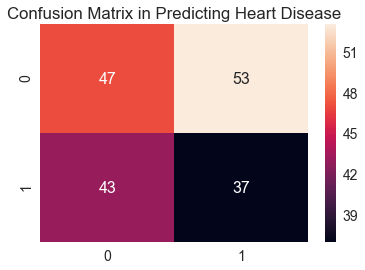

In [184]:
#plotting the confusion matrix using seaborn

df_cm = pd.DataFrame(array_cm, range(2),
                  range(2))
plt.title("Confusion Matrix in Predicting Heart Disease")

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

plt.show()


* 0: Heart disease is not present
* 1: Heart disease present

The explanation on confusion matrix:-

* 47 true positive prediction, aka, predicted with no heart disease, and they actually has no heart disease
* 37 true negative prediction, aka, predicted with heart disease, and they actually have no heart disease
* 53 false positive prediction, aka, we predicted they have a heart disease, but actually, they don't.
* 43 false negative prediction, where we predict they don't have a heart disease, but actually, they do. 


Based on the confusion matrix above, it does look like the model is performing pretty badly. However, it may be affected because you need to round up the probability from log-loss score. 

### Writing the submission.csv

The original submission.csv is filled with 0.5 as a baseline. We will then write the predictions into these file. The new file will then be submitted to the Machine Learning with a Heart Competition hosted by drivendata. They will process the submission and give the score. 

[drivendata competition](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/)

In [185]:
submission_format = pd.read_csv('submission_format.csv', index_col='patient_id')

In [186]:
predictions=eclf.predict_proba(features_test)[:, 1]

In [187]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [188]:
my_submission.head()

,heart_disease_present
patient_id,
olalu7,0.397112
z9n6mx,0.187949
5k4413,0.796234
mrg7q5,0.136509
uki4do,0.777290


In [189]:
#write the result to submission.csv

my_submission.to_csv('submission.csv')

The file has been submitted and my score is 0.4387

## Conclusion:-

Even though the score has exceeded the benchmarks, there's a few improvements on the model that can be done. There are:-

* More data so that the algorithm can predict better.
* Better feature engineering. A new feature created by the heart specialist. 
* Local data for local adaptation. Data used is gathered by the local sources. 